In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

In [16]:
path = r"G:\AI学习资料\machine-learning-2014\机器学习课程2014源代码\python代码\ex2-logistic regression\ex2data2.txt"
raw_data = pd.read_csv(path, sep=",", names=("test_1","test_2", "result"))
raw_data.head()

,test_1,test_2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### 画图

[]

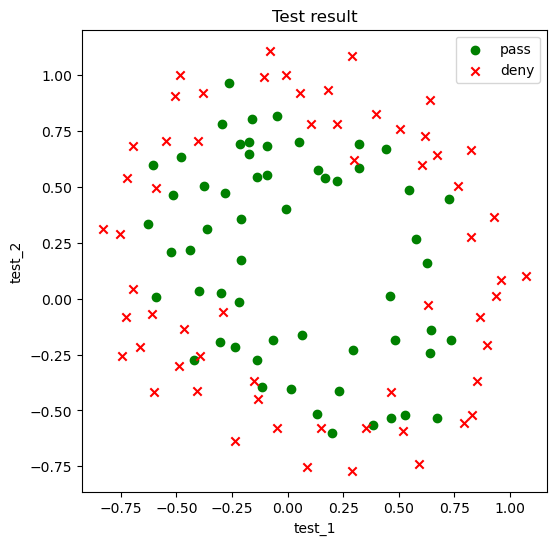

In [208]:
x = np.arange(-2,2,0.01)
pass_pro = raw_data[raw_data["result"]==1]
deny_pro = raw_data[raw_data["result"]==0]
fig = plt.figure(figsize=(6,6),dpi=100)
ax = plt.subplot()
ax.scatter(pass_pro["test_1"], pass_pro["test_2"], marker="o",color="green",label="pass")
ax.scatter(deny_pro["test_1"], deny_pro["test_2"], marker="x",color="red",label="deny")
ax.set_xlabel("test_1")
ax.set_ylabel("test_2")
ax.set_title("Test result")
ax.legend()
plt.plot()

In [183]:
# Define a function to map features.
# 'x' and 'y' are the two features to be mapped.
# 'power' is the maximum power to which the features will be raised.
# 'as_ndarray' is a boolean that determines whether the output should be a numpy array or a pandas DataFrame.
def feature_mapping(x, y, power, as_ndarray=False):
    # Create a dictionary to hold the mapped features.
    # For each pair of integers (i, p) such that 0 <= p <= i <= power, a new feature is created by raising 'x' to the power (i - p) and 'y' to the power 'p'.
    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    # If 'as_ndarray' is True, convert the DataFrame to a numpy array and return it.
    if as_ndarray:
        return pd.DataFrame(data).to_numpy()
    # Otherwise, return the DataFrame.
    else:
        return pd.DataFrame(data)

In [184]:
# 'data' is assigned the raw_data.
data = raw_data

# 'theta' is initialized as a zero vector of length 28.
theta = np.zeros(28)

# Define a function 'get_x' to process the features from the data.
# 'data' is the input DataFrame containing the features.
def get_x(data):
    # 'x1' and 'x2' are arrays of the values in the 'test_1' and 'test_2' columns of 'data', respectively.
    x1 = np.array(data.test_1)
    x2 = np.array(data.test_2)
    # 'X' is the feature matrix obtained by mapping 'x1' and 'x2' to polynomial features of maximum degree 6.
    # 'as_ndarray=True' specifies that 'X' should be a numpy array.
    X = feature_mapping(x1, x2, power=6,as_ndarray=True)
    # The function returns 'X'.
    return X

# Define a function 'get_y' to extract the target variable from the data.
# 'data' is the input DataFrame containing the target variable.
def get_y(data):
    # The function returns an array of the values in the 'result' column of 'data'.
    return data["result"].to_numpy()

# Define the sigmoid function.
# 'z' is the input to the function.
def sigmoid(z):
    # The function returns the sigmoid of 'z'.
    return 1/(1+np.exp(-z))

# 'X' is assigned the feature matrix obtained by calling 'get_x' with 'data'.
X = get_x(data)

# 'y' is assigned the target variable obtained by calling 'get_y' with 'data'.
y = get_y(data)

In [181]:
# Check if 'theta' is a one-dimensional array.
# If it is, convert it to a two-dimensional array by adding an extra dimension.
if theta.ndim==1:theta=theta[:,np.newaxis]

# Calculate the sum of the squares of all elements in 'theta', excluding the first element.
# This is often used in regularization to penalize large values of the parameters.
(theta[1:,:]**2).sum()

0.009648905480567117

In [185]:
# Define the cost function for logistic regression with regularization.
# 'theta' is the parameter vector.
# 'X' is the feature matrix.
# 'y' is the target variable.
# 'lamda' is the regularization parameter, which controls the degree of regularization. It is set to 1 by default.
def cost(theta,X,y,lamda=1):
    # If 'theta' is a one-dimensional array, convert it to a two-dimensional array by adding an extra dimension.
    if theta.ndim==1:theta=theta[:,np.newaxis]
    # 'm' is the number of instances in the dataset.
    m = X.shape[0]
    # 'cost_ori' is the original cost without regularization. It is the average of the log-likelihoods of the instances.
    cost_ori = (1/m)*(-y@np.log(sigmoid(X@theta)) - (1-y)@np.log(1-sigmoid(X@theta))).mean()
    # 'cost_add' is the additional cost due to regularization. It is half of the average of the squares of the parameters, excluding the first one.
    cost_add = (lamda/(2*m))*((theta[1:,:])**2).sum()
    # The function returns the sum of 'cost_ori' and 'cost_add'.
    return cost_ori + cost_add

In [186]:
cost(theta,X,y)

0.6931471805599453

In [188]:
# Define the gradient function for logistic regression with regularization.
# 'theta' is the parameter vector.
# 'X' is the feature matrix.
# 'y' is the target variable.
# 'lamda' is the regularization parameter, which controls the degree of regularization. It is set to 1 by default.
def gradient(theta, X, y, lamda=1):
    # 'm' is the number of instances in the dataset.
    m = X.shape[0]
    # If 'y' is a one-dimensional array, convert it to a two-dimensional array by adding an extra dimension.
    y = y[:,np.newaxis]
    # If 'theta' is a one-dimensional array, convert it to a two-dimensional array by adding an extra dimension.
    if theta.ndim==1:theta=theta[:,np.newaxis]
    # 'theta_0' is the gradient of the cost function with respect to the first parameter. It is the average of the products of the first feature and the prediction errors.
    theta_0 = (1/m)*X[:,0]@(sigmoid(X@theta)-y)
    # 'theta' is the gradient of the cost function with respect to the other parameters. It is the average of the products of the features and the prediction errors, plus the average of the parameters times 'lamda'.
    theta = (1/m)*X.T@(sigmoid(X@theta)-y) + (lamda/m)*theta
    # The first element of 'theta' is replaced by 'theta_0', because the first parameter is not regularized.
    theta[0,:] = theta_0
    # The function returns 'theta' as a one-dimensional array.
    return theta.flatten()

In [194]:
gradient(theta,X,y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [192]:
# Use the 'minimize' function from scipy's optimize module to find the parameters that minimize the cost function.
# 'fun' is the cost function to be minimized.
# 'x0' is the initial guess for the parameters, which is 'theta' in this case.
# 'args' are additional arguments to the cost function, which are 'X' and 'y' in this case.
# 'method' is the optimization method to be used, which is 'Newton-CG' in this case.
# 'jac' is the function that computes the gradient vector, which is 'gradient' in this case.
res = minimize(fun=cost, x0=theta, args=(X,y), method='Newton-CG', jac=gradient)

# Print the result of the optimization.
res

     fun: 0.5290027297127464
     jac: array([ 4.36916163e-08,  7.96754917e-08,  5.82650551e-08, -4.80325302e-08,
        4.36330278e-08,  4.84689333e-08,  6.58508720e-08, -2.94466873e-08,
       -7.03846297e-09,  7.50692051e-08, -7.35486395e-08, -6.31599956e-09,
       -6.35158353e-08,  1.49019352e-08,  1.91837012e-08,  3.74549903e-08,
       -1.34313146e-08, -2.04919103e-08, -1.54551228e-08, -4.88888689e-09,
        4.28040792e-08, -5.66209627e-08, -3.35512058e-09, -3.41630915e-08,
       -1.19079224e-08, -2.53012396e-08, -4.29667542e-09,  2.75065459e-09])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 57
  status: 0
 success: True
       x: array([ 1.27273947,  0.6252713 ,  1.18108893, -2.01995848, -0.91742359,
       -1.43166415,  0.12400695, -0.36553435, -0.35723987, -0.17512997,
       -1.4581568 , -0.05098979, -0.61555654, -0.27470622, -1.19281706,
       -0.2421876 , -0.20600595, -0.04473159, -0.27778475, -0.29537828,
       -0.4

In [202]:
# Define a function 'predict' to make predictions on the data.
# 'X' is the feature matrix.
# 'final_theta' is the final parameter vector obtained from the optimization.
def predict(X,final_theta):
    # 'result' is a boolean array indicating whether the predicted probability of the positive class is greater than or equal to 0.5.
    result = sigmoid(final_theta@X.T)>=0.5
    # The function returns 'result' as an integer array, where True is converted to 1 and False is converted to 0.
    return result.astype(int)

# 'pre_y' is assigned the predictions on 'X' using 'res.x' as the parameter vector.
pre_y = predict(X, res.x)

# Import the 'classification_report' function from sklearn's metrics module.
# This function builds a text report showing the main classification metrics.
from sklearn.metrics import classification_report

# Print the classification report for the true target variable 'y' and the predicted target variable 'pre_y'.
print(classification_report(y, pre_y))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



In [237]:
# Define a function 'draw_boundary' to draw the decision boundary of the logistic regression model.
# 'power' is the degree of the polynomial features.
# 'l' is the regularization parameter.
def draw_boundary(power, l):
    # 'density' is the number of points in the grid for plotting the decision boundary.
    density = 1000
    # 'threshhold' is the threshold for deciding whether a point is on the decision boundary.
    threshhold = 2 * 10**-3

    # 'final_theta' is the final parameter vector obtained from the logistic regression model with feature mapping and regularization.
    final_theta = feature_mapped_logistic_regression(power, l)
    # 'x' and 'y' are the coordinates of the points on the decision boundary.
    x, y = find_decision_boundary(density, power, final_theta, threshhold)
    # 'path' is the path of the data file.
    path = r"G:\AI学习资料\machine-learning-2014\机器学习课程2014源代码\python代码\ex2-logistic regression\ex2data2.txt"
    # 'df' is the data frame loaded from the data file.
    df = pd.read_csv(path, names=['test_1', 'test_2', 'result'])
    # Plot the data points with different colors for different classes.
    sns.lmplot(x='test_1', y='test_2', hue='result', data=df, height=6, fit_reg=False, scatter_kws={"s": 100})

    # Plot the decision boundary.
    plt.scatter(x, y, color='red', s=10)
    plt.title('Decision boundary')
    plt.show()

In [233]:
def feature_mapped_logistic_regression(power, l):
#     """for drawing purpose only.. not a well generealize logistic regression
#     power: int
#         raise x1, x2 to polynomial power
#     l: int
#         lambda constant for regularization term
#     """
    path = r"G:\AI学习资料\machine-learning-2014\机器学习课程2014源代码\python代码\ex2-logistic regression\ex2data2.txt"
    df = pd.read_csv(path, names=['test_1', 'test_2', 'result'])
    x1 = np.array(df.test_1)
    x2 = np.array(df.test_2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = minimize(fun=cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=gradient)
    final_theta = res.x

    return final_theta

In [234]:
def feature_mapped_logistic_regression(power, l):
    # 'power' is the degree of the polynomial features.
    # 'l' is the regularization parameter.

    # 'path' is the path of the data file.
    path = r"G:\AI学习资料\machine-learning-2014\机器学习课程2014源代码\python代码\ex2-logistic regression\ex2data2.txt"
    # 'df' is the data frame loaded from the data file.
    df = pd.read_csv(path, names=['test_1', 'test_2', 'result'])
    # 'x1' and 'x2' are the first and second features.
    x1 = np.array(df.test_1)
    x2 = np.array(df.test_2)
    # 'y' is the target variable.
    y = get_y(df)

    # 'X' is the feature matrix obtained by mapping 'x1' and 'x2' to polynomial features.
    X = feature_mapping(x1, x2, power, as_ndarray=True)
    # 'theta' is the initial guess for the parameters, which is a zero vector.
    theta = np.zeros(X.shape[1])

    # Use the 'minimize' function from scipy's optimize module to find the parameters that minimize the cost function.
    # 'fun' is the cost function to be minimized.
    # 'x0' is the initial guess for the parameters, which is 'theta' in this case.
    # 'args' are additional arguments to the cost function, which are 'X', 'y', and 'l' in this case.
    # 'method' is the optimization method to be used, which is 'TNC' in this case.
    # 'jac' is the function that computes the gradient vector, which is 'gradient' in this case.
    res = minimize(fun=cost,
                   x0=theta,
                   args=(X, y, l),
                   method='TNC',
                   jac=gradient)
    # 'final_theta' is the final parameter vector obtained from the optimization.
    final_theta = res.x

    # The function returns 'final_theta'.
    return final_theta

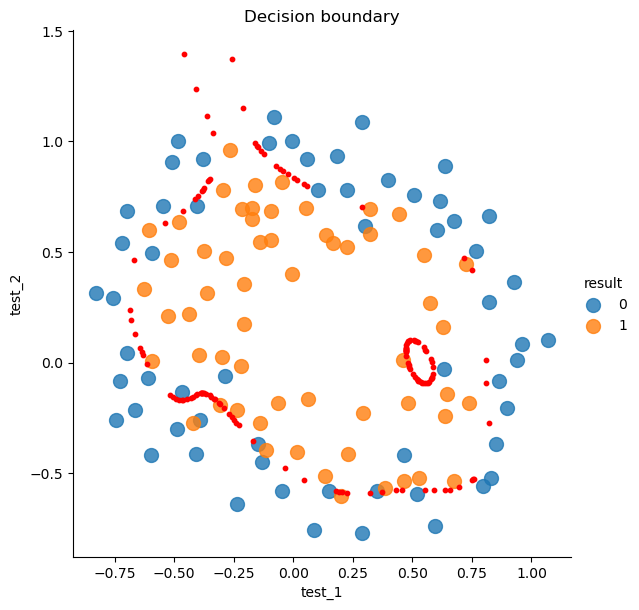

In [236]:
draw_boundary(power=6, l=0)  # no regularization, over fitting，#lambda=0,没有正则化，过拟合了